Tutorials I have read:
- https://www.tensorflow.org/tutorials/images/classification     (I almost copied everything from this sample)
- https://www.tensorflow.org/tutorials/keras/classification      (I followed how the code adapted the multi categories type and model testing here)
- https://www.tensorflow.org/tutorials/keras/save_and_load       (How to save and load models so you can save your progress and train them tomorrow)
- https://keras.io/api/preprocessing/image/                      (I copied the code snippet where you load an image and convert them into an array)
- https://missinglink.ai/guides/tensorflow/tensorflow-image-classification/ (This site documents how pretty much this code classifies image)

At the point of this writing, the model shows about 95% accuracy in prediction, but it honestly is not. 

In [35]:
#Prerequisites

#if you have an outdated numpy and tensorflow

#pip uninstall tensorflow
#pip uninstall numpy

In [36]:
#Installation

#pip install tensorflow   #(the most recent)
#pip install numpy

**IMPORT MODULES**

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

import os
import numpy as np
import matplotlib.pyplot as plt

**LOAD DATA**

In [3]:
trainDir = 'samples_train/'
testDir = 'samples_test/'

In [4]:
categoryTrainDir = [(trainDir + i + '/') for i in os.listdir(trainDir)]
categoryTestDir = [(testDir + i + '/') for i in os.listdir(trainDir)]

**ANALYZE DATA**

In [5]:
categoryTrainCount = [len(os.listdir(categ)) for categ in categoryTrainDir]
categoryTestCount = [len(os.listdir(categ)) for categ in categoryTestDir]

In [6]:
for categ in range(42):
    print('total {0} images| training: {1} | test: {2}'.\
          format(categ, categoryTrainCount[categ], categoryTestCount[categ]))
    
print()

totalTrainImages = 0
totalTestImages = 0

for i in categoryTrainCount: totalTrainImages += i
for i in categoryTestCount: totalTestImages += i
    
print('total images| training: {1} | test: {2}'.\
          format(categ, totalTrainImages, totalTestImages))

total 0 images| training: 45 | test: 5
total 1 images| training: 45 | test: 5
total 2 images| training: 45 | test: 5
total 3 images| training: 46 | test: 4
total 4 images| training: 45 | test: 5
total 5 images| training: 42 | test: 5
total 6 images| training: 44 | test: 5
total 7 images| training: 45 | test: 5
total 8 images| training: 45 | test: 4
total 9 images| training: 45 | test: 4
total 10 images| training: 44 | test: 5
total 11 images| training: 45 | test: 5
total 12 images| training: 44 | test: 5
total 13 images| training: 43 | test: 5
total 14 images| training: 46 | test: 4
total 15 images| training: 42 | test: 5
total 16 images| training: 46 | test: 4
total 17 images| training: 43 | test: 5
total 18 images| training: 43 | test: 5
total 19 images| training: 45 | test: 5
total 20 images| training: 45 | test: 5
total 21 images| training: 45 | test: 4
total 22 images| training: 45 | test: 5
total 23 images| training: 44 | test: 5
total 24 images| training: 45 | test: 4
total 25 i

**PRESET VARIABLES**

In [7]:
batch_size = 128
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [8]:
#Epochs is the count of generation the program will go through training our model
#Img width and img height resizes our image automatically to a lower more processible tensors

In [9]:
classifications = ['women_clothes','women_sleeves','women_shirt','women_jacket','women_pants','rings','earrings','cap','wallet','bag','cellphone_case','cellphone','clock',
'bottle','rice_cooker','coffee','women_shoes','women_heels','eletronics','flash_drive','chair','tennis','bikingw','gloves','watchw','belt','earphones','toy_car','men_jacket','men_pants',
'men_shoes','snack','sanitary','alcohol','facial','perfume','bucket','laptop','bowl','pot','hose','sofa']

**DATA PREPARATION**

In [10]:
train_image_generator = ImageDataGenerator(rescale=1/1) 
# Generator for our training data

validation_image_generator = ImageDataGenerator(rescale=1/1) 
#Generator for our validation data

In [11]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=trainDir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 1870 images belonging to 42 classes.


In [12]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=testDir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 200 images belonging to 42 classes.


**VISUALIZE TRAINING IMAGES**

In [13]:
sampleImg,_ = next(train_data_gen)

In [14]:
def rescaleImgColor(img):
    
    new_img = img.copy()
    
    for i in range(len(new_img)):
        new_img[i] /= 255.
        
    return new_img

In [15]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        rescaledImg = rescaleImgColor(img)
        ax.imshow(rescaledImg)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

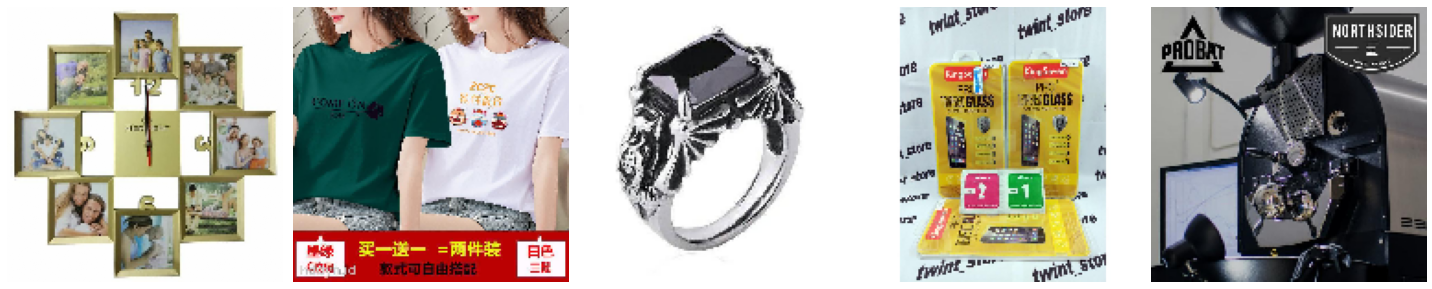

In [16]:
plotImages(sampleImg[:5])

**CREATING THE MODEL**

In [17]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(42)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

**TRAIN THE MODEL**

In [20]:
epochs = 10

In [34]:
checkpoint_path = "training_1/cp.ckpt"
#checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [22]:
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1,
                                                 save_freq=50
                                                )

In [23]:
#UNCOMMENT THIS IF YOU ALREADY STARTED TRAINING. THIS LOADS YOUR PREVIOUSLY TRAINED MODEL

#model.load_weights(checkpoint_path)

In [24]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=totalTrainImages // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=totalTestImages // batch_size,
    callbacks=[cp_callback]
)

Epoch 1/10
14/14 [==============================] - 23s 2s/step - loss: 176.1372 - accuracy: 0.0218 - val_loss: 4.5911 - val_accuracy: 0.0312
Epoch 2/10
14/14 [==============================] - 22s 2s/step - loss: 3.9312 - accuracy: 0.0517 - val_loss: 3.7808 - val_accuracy: 0.0703
Epoch 3/10
14/14 [==============================] - 24s 2s/step - loss: 3.4014 - accuracy: 0.1561 - val_loss: 3.9794 - val_accuracy: 0.0391
Epoch 4/10
 7/14 [==============>...............] - ETA: 9s - loss: 2.6105 - accuracy: 0.3672 
Epoch 00004: saving model to training_2/cp-0004.ckpt
14/14 [==============================] - 24s 2s/step - loss: 2.5517 - accuracy: 0.3737 - val_loss: 4.5191 - val_accuracy: 0.0625
Epoch 5/10
14/14 [==============================] - 23s 2s/step - loss: 1.8276 - accuracy: 0.5608 - val_loss: 5.6082 - val_accuracy: 0.0469
Epoch 6/10
14/14 [==============================] - 23s 2s/step - loss: 1.3188 - accuracy: 0.6897 - val_loss: 6.2269 - val_accuracy: 0.0859
Epoch 7/10
14/14 [===

**VISUALIZE TRAINING RESULTS**

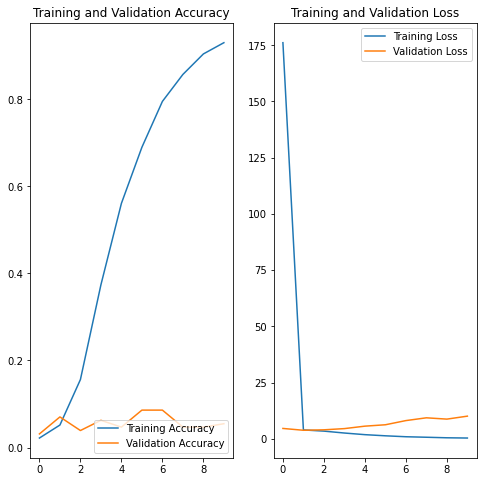

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**TEST MODEL - Make Predictions**

In [26]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

Load the model that you will use for prediction

In [27]:
from PIL import Image

def rescale_images(directory, size):
    for img in os.listdir(directory):
        im = Image.open(directory+img)
        im_resized = im.resize(size, Image.ANTIALIAS)
        im_resized.save(directory+img)

It is important to resize the image into what the model is trained to, in this case 125 by 125. This function^ resizes all the images inside a directory

In [28]:
def plotImagesSingle(img):
    plt.imshow(img)

In [29]:
def classifyImg(img):
    image = keras.preprocessing.image.load_img(img)
    
    input_arr = keras.preprocessing.image.img_to_array(image)
    
    rescaledImg = rescaleImgColor(input_arr)
    plotImagesSingle(rescaledImg)
    
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    
    predictions = model.predict(input_arr)
    
    retu = np.argmax(predictions)
    
    return retu

^ Classify an image you will provide through a directory. 
- First, load the image by using the preloaded keras imager loader
- Then, convert the image into a processable array
- Rescale the rgb array [0-255] to [0.0-1.0]. This is a self written code as 'plotImagesSingle'
- Classify the loaded and processed image using the model
- Using numpy's argmax, return the class with highest probability

In [30]:
img2Prc = '0dfb9928e0be21246fc83702212db7b9.jpg'

'perfume'

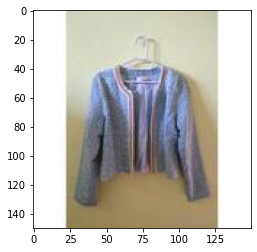

In [31]:
classifications[classifyImg(img2Prc)]

Classifications is an array that contains the list of all category names. ClassifyImg returns the predicted classification of the provided image (img2Prc)

In [32]:
target_folder = 'samples_test/05/'

eletronics
belt
eletronics
bag
laptop


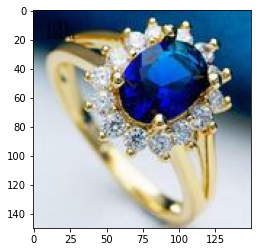

In [33]:
rescale_images(target_folder, (IMG_HEIGHT, IMG_WIDTH))

for i in os.listdir(target_folder):
    print(classifications[classifyImg(target_folder + i)])

^Assuming that all images in the folder is not 150x150 in size, we need to resize them.

^^ For all items in the directory list, predict their category